<a href="https://colab.research.google.com/github/AybarsCebi/CS412-Machine-Learning-Course-Sabanci-University/blob/main/CS412_HW1_mcebi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.src.api_export import keras_export
from keras.src.utils.file_utils import get_file
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
import keras

In [ ]:
#2.1
(x_train_val, y_train_val), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [ ]:
# 2.2
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2,random_state=42)

print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)
print("Test set shape:", x_test.shape, y_test.shape)

Training set shape: (48000, 28, 28) (48000,)
Validation set shape: (12000, 28, 28) (12000,)
Test set shape: (10000, 28, 28) (10000,)


Class distribution:
Digit 0: 4748 samples
Digit 1: 5420 samples
Digit 2: 4784 samples
Digit 3: 4912 samples
Digit 4: 4666 samples
Digit 5: 4317 samples
Digit 6: 4741 samples
Digit 7: 4966 samples
Digit 8: 4691 samples
Digit 9: 4755 samples
************************************
Mean pixel value: 33.34
Standard deviation of pixel values: 78.59
************************************


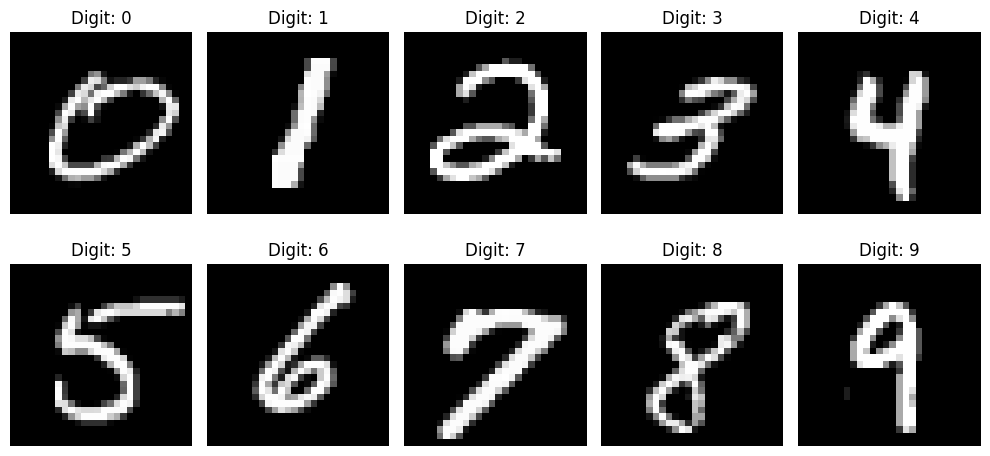

In [ ]:
#2.2
unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")
print("************************************")
mean_pixel_value = np.mean(x_train)
std_pixel_value = np.std(x_train)
print(f"Mean pixel value: {mean_pixel_value:.2f}")
print(f"Standard deviation of pixel values: {std_pixel_value:.2f}")
print("************************************")

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()
for i in range(10):
    sample_index = np.where(y_train == i)[0][0]
    axes[i].imshow(x_train[sample_index], cmap="gray")
    axes[i].set_title(f"Digit: {i}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()


In [ ]:
#2.3
# Normalized the images
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns


Validation Accuracy for k=1: 0.9741
Validation Accuracy for k=3: 0.9727
Validation Accuracy for k=5: 0.9715
Validation Accuracy for k=7: 0.9696
Validation Accuracy for k=9: 0.9673


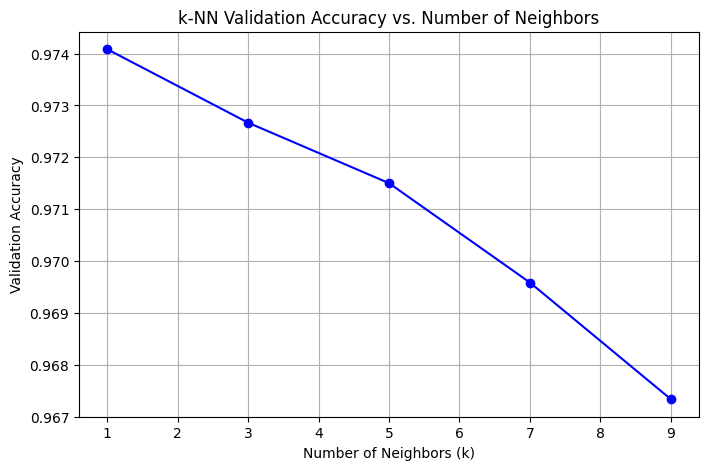

In [ ]:
#3.1
neighbors_list = [1, 3, 5, 7, 9]
accuracy_scores = []

# Flatten images for k-NN classifier, normalized
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)
    y_val_pred = knn.predict(x_val_flat)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracy_scores.append(accuracy)
    print(f"Validation Accuracy for k={k}: {accuracy:.4f}")

# Plot validation accuracy vs. number of neighbors
plt.figure(figsize=(8, 5))
plt.plot(neighbors_list, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.title("k-NN Validation Accuracy vs. Number of Neighbors")
plt.grid(True)
plt.show()

Best k: 1

kNN Results:
Accuracy: 0.9691
Precision: 0.9692
Recall: 0.9691
F1-score: 0.9691


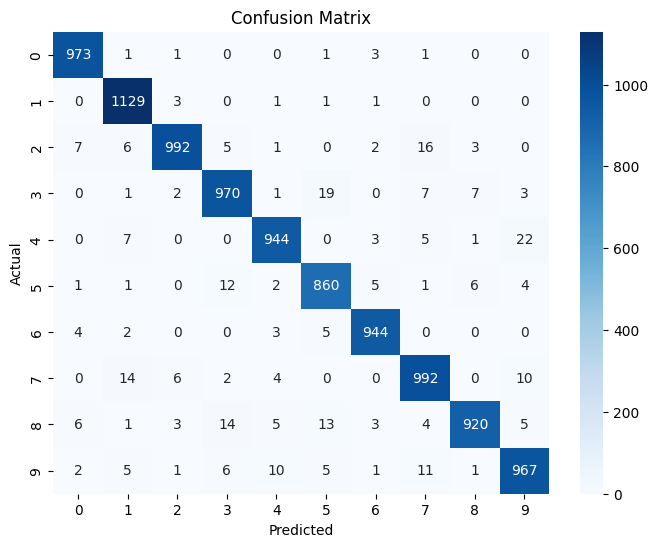

Most misclassified digits: [8 9]


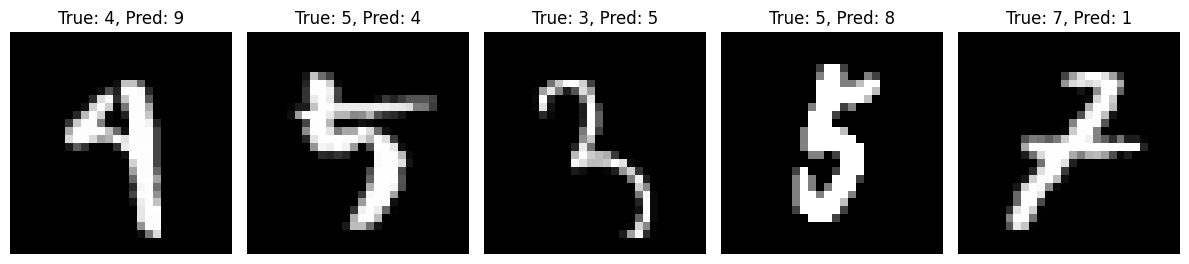

In [ ]:
#3.2
# Retrain using best k on training + validation set
best_k = neighbors_list[np.argmax(accuracy_scores)]
print(f"Best k: {best_k}")

x_train_full = np.vstack((x_train_flat, x_val_flat))
y_train_full = np.concatenate((y_train, y_val))

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(x_train_full, y_train_full)

y_pred = knn_final.predict(x_test_flat)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("\nkNN Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Identify most misclassified digits
misclassified_counts = np.sum(cm, axis=1) - np.diag(cm)
most_misclassified = np.argsort(misclassified_counts)[-2:][::-1]  # Top 2 misclassified digits
print(f"Most misclassified digits: {most_misclassified}")

# Display 5 random misclassified examples
misclassified_digits = np.where(y_test != y_pred)[0]
random_digits = np.random.choice(misclassified_digits, 5, replace=False)

fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i, idx in enumerate(random_digits):
    axes[i].imshow(x_test[idx].reshape(28, 28), cmap="gray")
    axes[i].set_title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

In [ ]:
#4.1
# Define hyperparameter grid
max_depth_values = [2, 5, 10]
min_samples_split_values = [2, 5]

best_model = None
best_accuracy = 0
best_params = {}

# Train and evaluate models with different hyperparameter combinations
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        clf.fit(x_train_flat, y_train_split)

        y_pred = clf.predict(x_val_flat)
        accuracy = accuracy_score(y_val, y_pred)

        print(f"Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Accuracy: {accuracy:.4f}")

        # to find the best parameters for the model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = clf
            best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}

print("\nBest Model Parameters:", best_params)
print("Best Model Accuracy:", best_accuracy)

Max Depth: 2, Min Samples Split: 2, Accuracy: 0.3377
Max Depth: 2, Min Samples Split: 5, Accuracy: 0.3377
Max Depth: 5, Min Samples Split: 2, Accuracy: 0.6579
Max Depth: 5, Min Samples Split: 5, Accuracy: 0.6579
Max Depth: 10, Min Samples Split: 2, Accuracy: 0.8581
Max Depth: 10, Min Samples Split: 5, Accuracy: 0.8565

Best Model Parameters: {'max_depth': 10, 'min_samples_split': 2}
Best Model Accuracy: 0.8580833333333333


In [ ]:
final_model = DecisionTreeClassifier(max_depth=best_params['max_depth'],min_samples_split=best_params['min_samples_split'], random_state=42)
final_model.fit(x_train_full, y_train_full)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = final_model.predict(x_test_flat)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Test Accuracy: 0.8663
Precision: 0.8668
Recall: 0.8663
F1-score: 0.8663


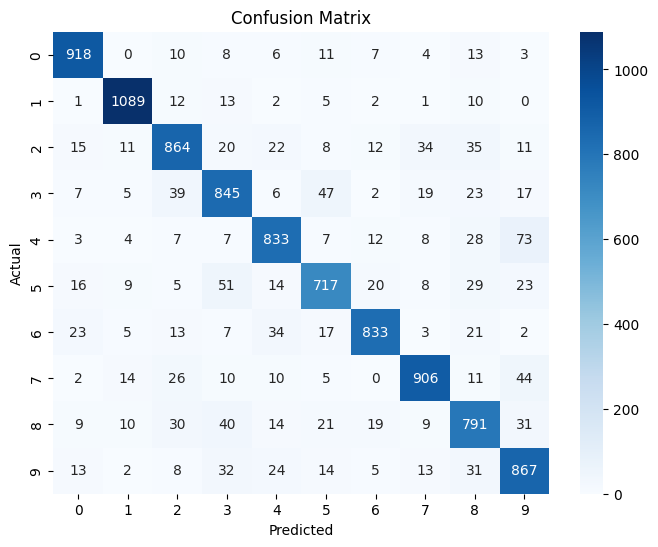

Most misclassified digits: [8 5]


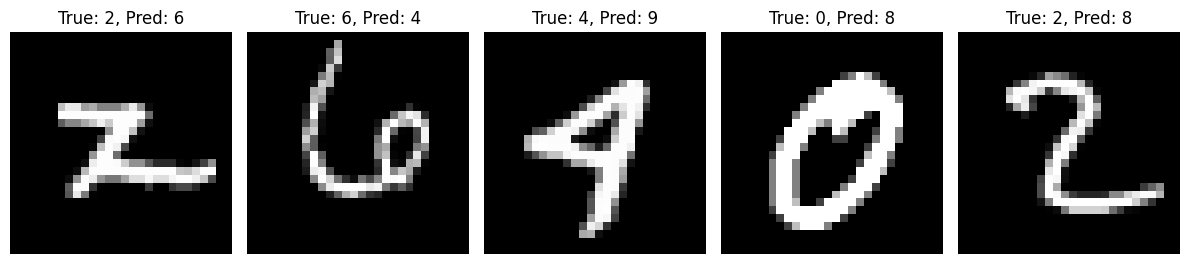

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Identify most misclassified digits
misclassified_counts_DT = np.sum(cm, axis=1) - np.diag(cm)
most_misclassified_DT = np.argsort(misclassified_counts_DT)[-2:][::-1]  # Top 2 misclassified digits
print(f"Most misclassified digits: {most_misclassified_DT}")

# Display 5 random misclassified examples
misclassified_digits_DT = np.where(y_test != y_pred)[0]
random_digits_DT = np.random.choice(misclassified_digits_DT, 5, replace=False)

fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i, idx in enumerate(random_digits_DT):
    axes[i].imshow(x_test[idx].reshape(28, 28), cmap="gray")
    axes[i].set_title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()

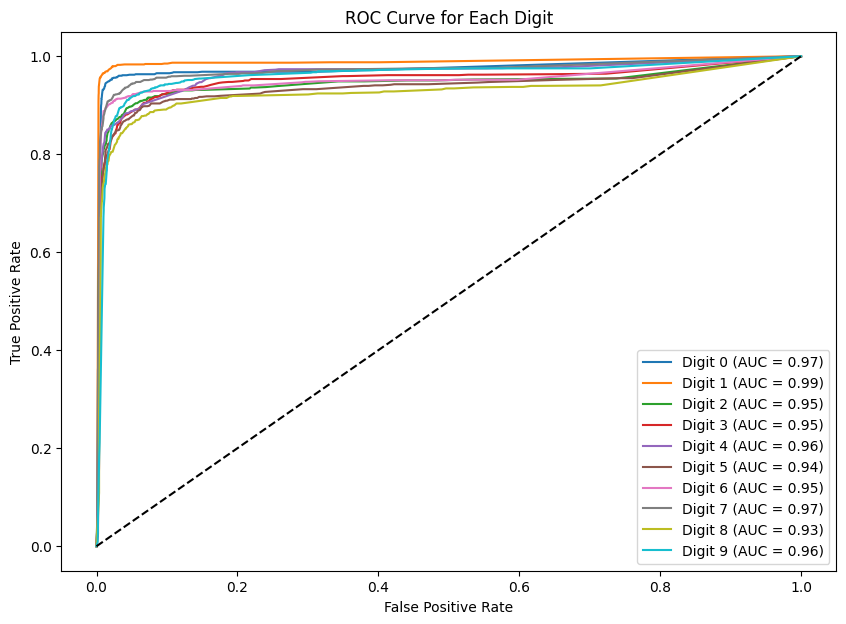

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_binarized = label_binarize(y_test, classes=range(10))
y_test_pred_prob = final_model.predict_proba(x_test_flat)

plt.figure(figsize=(10, 7))

for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Digit {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random model line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Digit")
plt.legend(loc="lower right")
plt.show()
